In [8]:
import pyzx as zx
import random
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumCircuit, ParameterVector

In [19]:
#seed固定
random.seed(1000)

#回路作成
g = zx.generate.cliffordT(4,100,p_t=0.20)
#print(g.stats())
c = zx.Circuit.from_graph(g)
print(c.stats())
qasm_str_bef = c.to_basic_gates().to_qasm()
circuit_qiskit_bef = QuantumCircuit.from_qasm_str(qasm_str_bef)
print("gate_num", circuit_qiskit_bef.size())
print("gate_count", circuit_qiskit_bef.count_ops())
print("depth", circuit_qiskit_bef.depth())


#普通の最適化
c = zx.optimize.basic_optimization(c.split_phase_gates(),quiet=True)
#print(c.stats())
zx.draw(c)
#グラフ変換
g = c.to_graph()
#zx.d3.draw(g)


zx.simplify.clifford_simp(g,quiet=False)
#g.normalize()
#zx.draw(g)

c = zx.extract.streaming_extract(g.copy())
print(c.to_basic_gates().stats())
zx.draw(c.to_basic_gates())
zx.draw(c)


qasm_str_aft = c.to_basic_gates().to_qasm()
circuit_qiskit_aft = QuantumCircuit.from_qasm_str(qasm_str_aft)
print("gate_num", circuit_qiskit_aft.size())
print("gate_count", circuit_qiskit_aft.count_ops())
print("gate_count", circuit_qiskit_aft.CountsOps())
print("depth", circuit_qiskit_aft.depth())


Circuit  on 4 qubits with 100 gates.
        19 is the T-count
        81 Cliffords among which
        31 2-qubit gates (31 CNOT, 0 other) and
        0 Hadamard gates.
gate_num 100
gate_count OrderedDict([('cx', 31), ('s', 25), ('rx', 25), ('t', 19)])
depth 52


spider_simp: 19. 11. 7. 3. 1.  5 iterations
pivot_simp: 6. 3. 1.  3 iterations
lcomp_simp: 11. 4. 4. 5.  4 iterations
id_simp: 1.  1 iterations
pivot_simp: 1. 1.  2 iterations
pivot_boundary_simp: 1.  1 iterations
This function is deprecated. Call extract_circuit() instead.
Circuit  on 4 qubits with 57 gates.
        9 is the T-count
        48 Cliffords among which
        24 2-qubit gates (1 CNOT, 23 other) and
        19 Hadamard gates.


gate_num 57
gate_count OrderedDict([('cz', 23), ('h', 19), ('rz', 14), ('cx', 1)])


AttributeError: 'QuantumCircuit' object has no attribute 'CountsOps'

bef
aft


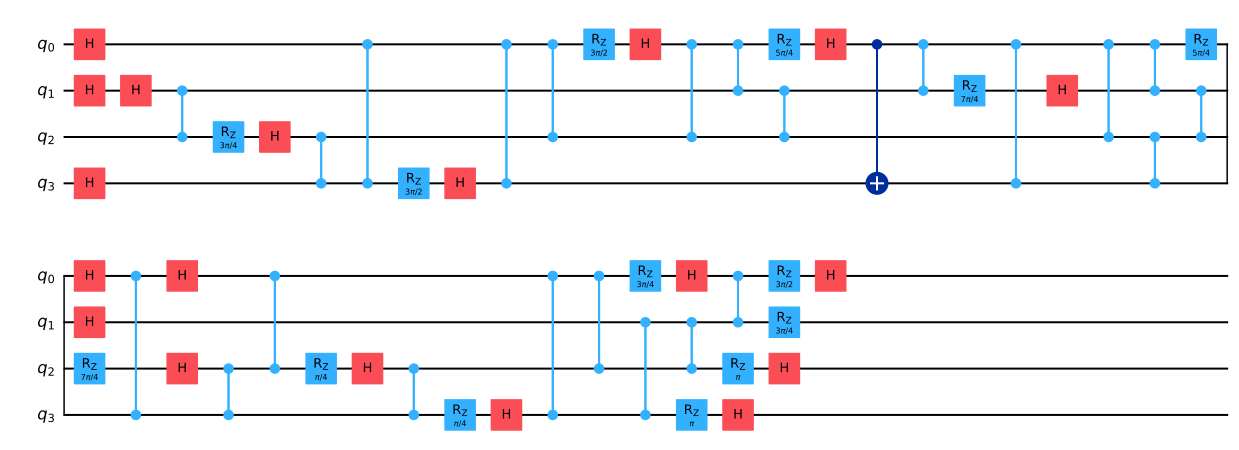

In [17]:
print("bef")
circuit_qiskit_bef.draw('mpl')
print("aft")
circuit_qiskit_aft.draw('mpl')

In [ ]:
circuit_qiskit_aft = QuantumCircuit.from_qasm_str(c.to_basic_gates().to_qasm())
print("gate_count", circuit_qiskit_aft.count_ops())

qasm_str_aft = c.to_basic_gates().to_qasm()

circuit_qiskit_aft = QuantumCircuit.from_qasm_str(c.to_qasm())
print("gate_count", circuit_qiskit_aft.count_ops())

gate_count OrderedDict([('cz', 23), ('h', 19), ('rz', 14), ('cx', 1)])
gate_count OrderedDict([('cz', 23), ('h', 19), ('rz', 14), ('cx', 1)])


Circuit  on 4 qubits with 100 gates.
        11 is the T-count
        89 Cliffords among which
        36 2-qubit gates (36 CNOT, 0 other) and
        0 Hadamard gates.
Circuit  on 4 qubits with 56 gates.
        9 is the T-count
        47 Cliffords among which
        22 2-qubit gates (5 CNOT, 17 other) and
        21 Hadamard gates.


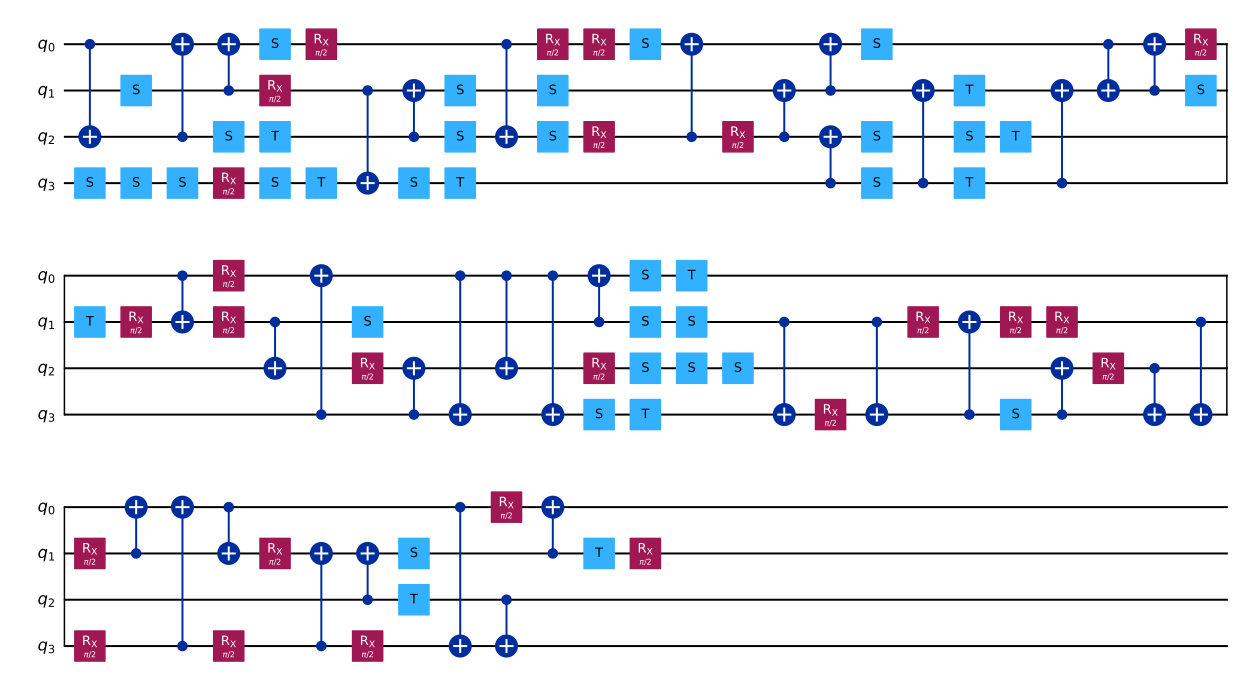

In [ ]:
qasm_str_bef = c2.to_basic_gates().to_qasm()
qasm_str_aft = c.to_basic_gates().to_qasm()

print(c2.to_basic_gates().stats())
print(c.to_basic_gates().stats())

circuit_qiskit_bef = QuantumCircuit.from_qasm_str(qasm_str_bef)
circuit_qiskit_bef.draw('mpl',filename='circuit_qiskit_bef.png')

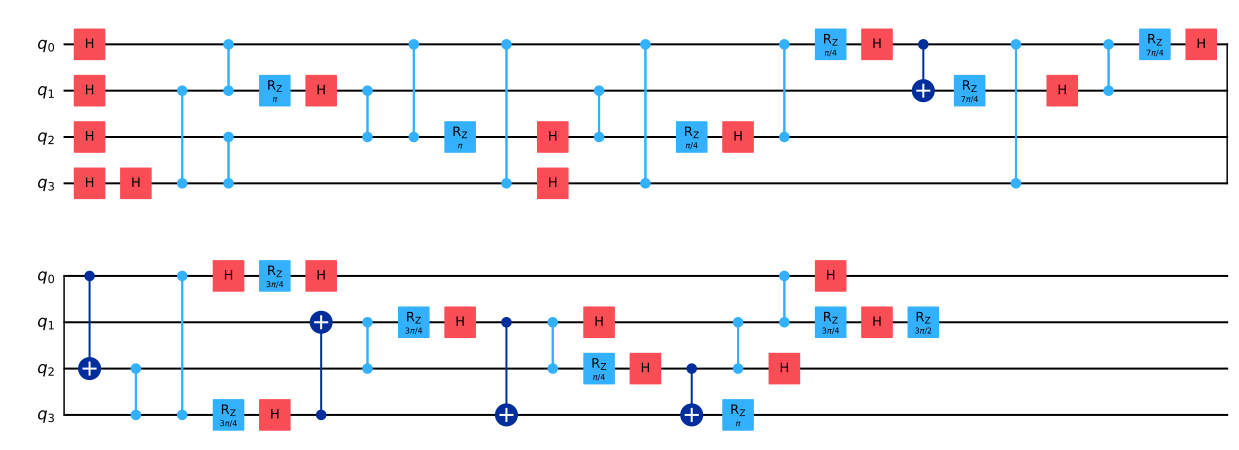

In [ ]:
print(qasm_str_aft)
circuit_qiskit_aft = QuantumCircuit.from_qasm_str(qasm_str_aft)
circuit_qiskit_aft.draw('mpl',filename='circuit_qiskit_aft.png')